# Question 7

<p>In this question wer are going to fit GMM on blue or red images.
First we read all the images and find their class wheter their red or blue value in RGB in bigger.
Then for each class we fit a 2 component GMM and plot the results.
Finally we fit GMM with different components and find the AIC and BIC of them to find the best number of components for each class and all the data. We know BIC and AIC should be minimized to have the best number of components.</p>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [11]:
import cv2
import glob

images = []
for img in glob.glob("C:/Users/ssa/Desktop/Machine_Learning/HW3/Images/*.jpg"):
    cv_img = cv2.imread(img, cv2.COLOR_BGR2RGB)
    name = img.split('\\')[1].split('.')[0][0]
    images.append((cv_img, name))
    
print(len(images))

122


In [12]:
df = []
for img in images:
    average = img[0].mean(axis=0).mean(axis=0)
    red, blue = average[0], average[2]
    if img[1] == 'c':
        label = 0
    else:
        label = 1
    
    new_row = {'red':red, 'blue': blue, 'label': label}
    df.append(new_row)
    

# Define class for each image along with their red and blue values

In [13]:
df = pd.DataFrame(df, columns=['red', 'blue', 'label'])
df

,red,blue,label
0,146.868117,99.266885,0
1,188.230243,171.014902,0
2,50.240636,45.925127,0
3,93.945119,81.871091,0
4,77.863994,95.688082,0
...,...,...,...
117,55.335941,85.727822,1
118,39.341766,60.754921,1
119,49.742772,90.832776,1
120,52.770046,96.540052,1


# Plot the values with respect to color of their class

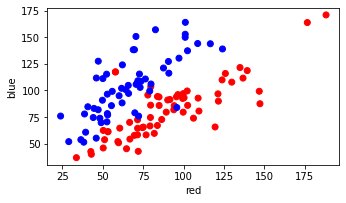

In [14]:
colors = ['red','blue']
df_features = df.drop('label', axis=1)
class_labels = df.label
columns = df_features.columns

plt.figure()
plt.scatter(df_features.iloc[:,0], df_features.iloc[:,1], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(columns[0]); plt.ylabel(columns[1])

plt.tight_layout(pad=5)

In [28]:
from sklearn import mixture
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
def plot_results(X, Y, means, covariances, index, title):
    color_iter = itertools.cycle(['blue','red'])
    
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.title(title)
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Fit and Plot 2 component GMM on Red class

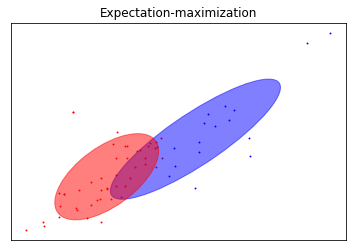

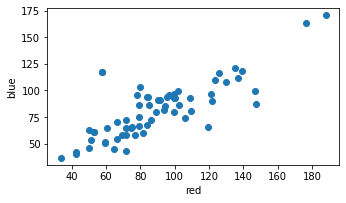

In [30]:
# Fit a Gaussian mixture with EM using two components for class red
X = df.drop('label', axis=1)
X = X[df.label == 0].values

gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', max_iter=100).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Expectation-maximization')

colors = ['red']
df_features = df.drop('label', axis=1)
df_features = df_features[df.label == 0]
class_labels = df.label
columns = df_features.columns

plt.figure()
plt.scatter(df_features.iloc[:,0], df_features.iloc[:,1], cmap='red')
plt.xlabel(columns[0]); plt.ylabel(columns[1])

plt.tight_layout(pad=5)

# Fit and Plot 2 component GMM on Blue class

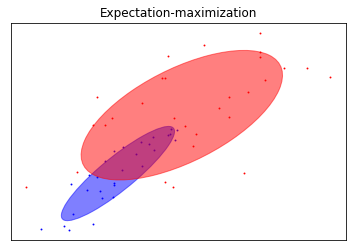

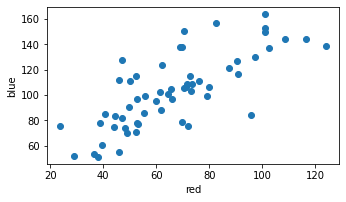

In [31]:
# Fit a Gaussian mixture with EM using two components for class red
X = df.drop('label', axis=1)
X = X[df.label == 1].values

gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', max_iter=100).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Expectation-maximization')

colors = ['red']
df_features = df.drop('label', axis=1)
df_features = df_features[df.label == 1]
class_labels = df.label
columns = df_features.columns

plt.figure()
plt.scatter(df_features.iloc[:,0], df_features.iloc[:,1], cmap='red')
plt.xlabel(columns[0]); plt.ylabel(columns[1])

plt.tight_layout(pad=5)

# Compare different number of components and Find AIC and  BIC
<p>As it can be seen in the plot below:</p>

<img>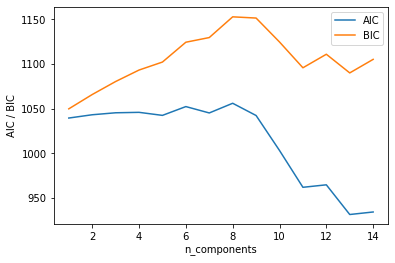</img>

<p>number of components in which minimizes the AIC and BIC is equal to <b>13</b></p>

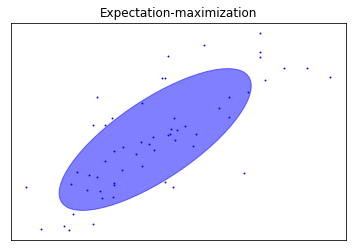

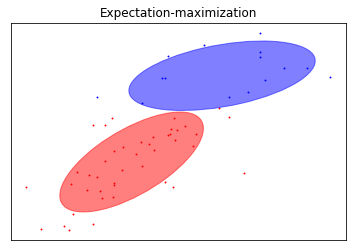

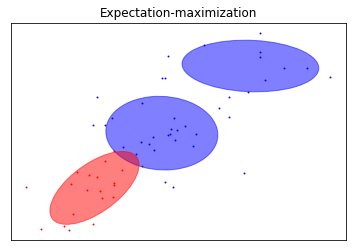

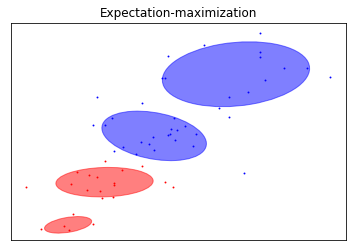

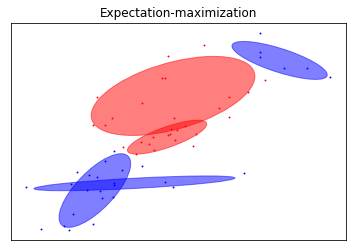

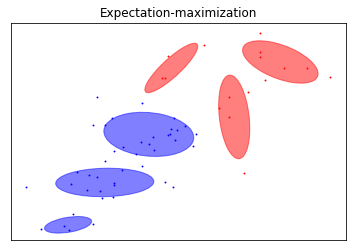

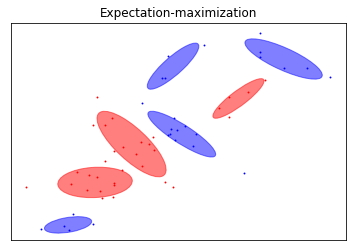

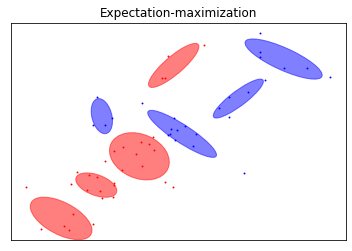

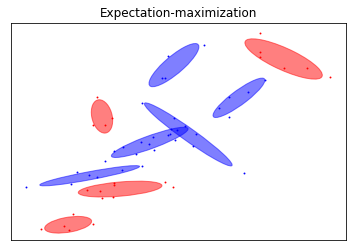

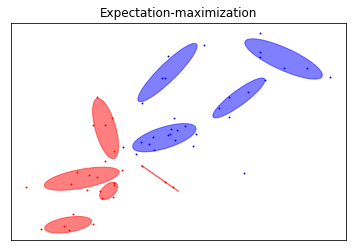

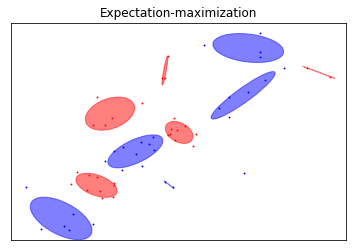

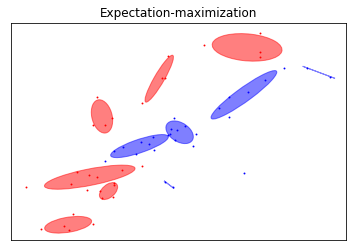

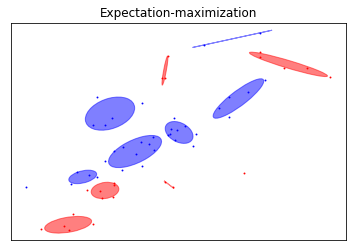

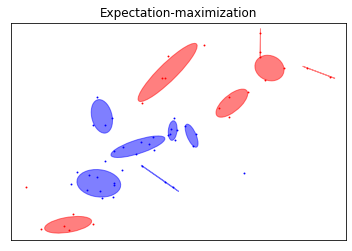

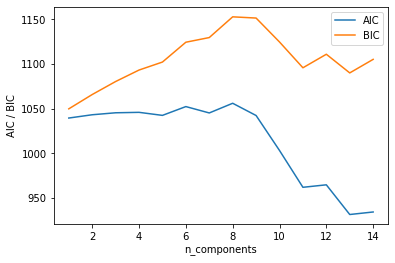

In [32]:
n_components = np.arange(1, 15)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)


X = df.drop('label', axis=1)
X = X[df.label == 1].values
for i, n in enumerate(n_components):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type='full').fit(X)
    gmm.fit(X)

    AIC[i] = gmm.aic(X)
    BIC[i] = gmm.bic(X)
    
    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Expectation-maximization')

plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')
plt.show()



# Compare different number of components and Find AIC and  BIC for class blue
<p>As it can be seen in the plot below:</p>

<img>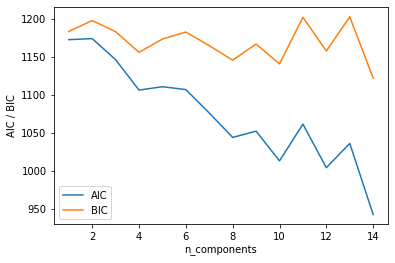</img>

<p>number of components in which minimizes the AIC and BIC is equal to <b>14</b></p>

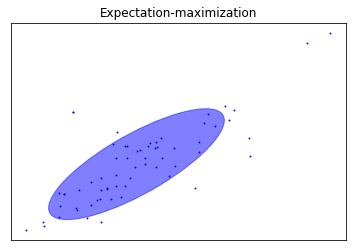

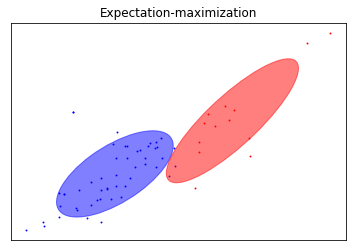

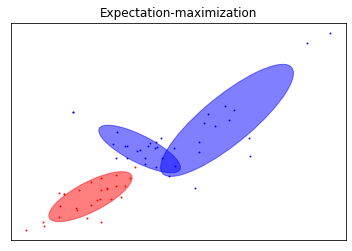

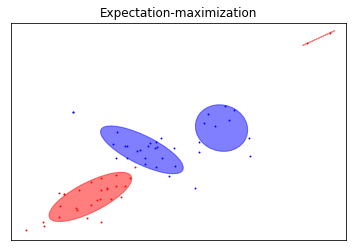

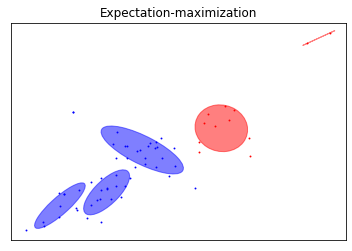

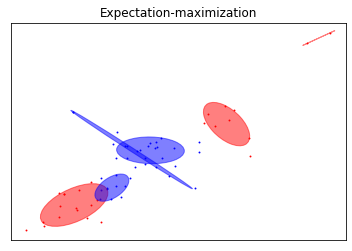

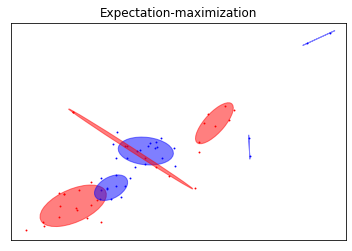

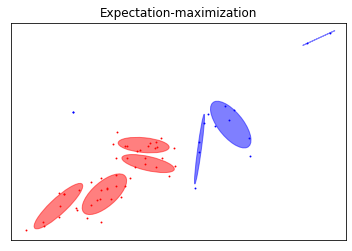

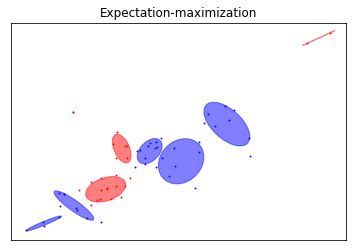

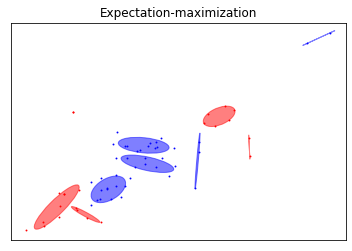

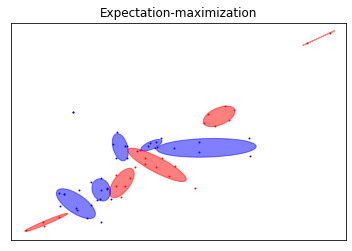

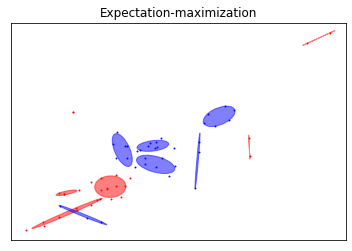

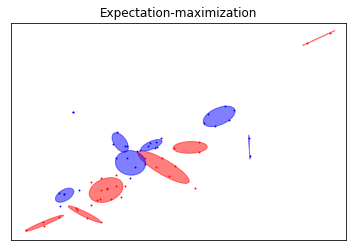

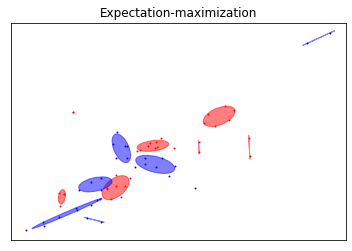

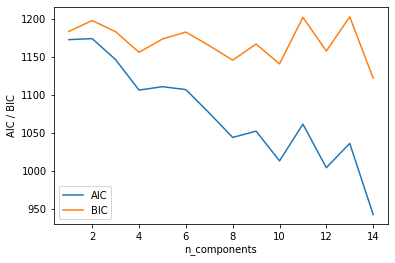

In [33]:
n_components = np.arange(1, 15)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)


X = df.drop('label', axis=1)
X = X[df.label == 0].values
for i, n in enumerate(n_components):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type='full').fit(X)
    gmm.fit(X)

    AIC[i] = gmm.aic(X)
    BIC[i] = gmm.bic(X)
    
    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Expectation-maximization')

plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')
plt.show()

# Compare different number of components and Find AIC and  BIC for both classes
<p>As it can be seen in the plot below:</p>

<img>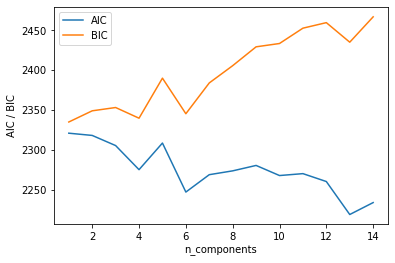</img>

<p>number of components in which minimizes the AIC and BIC is equal to <b>6</b></p>

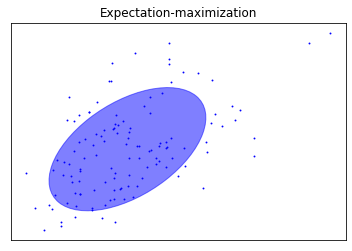

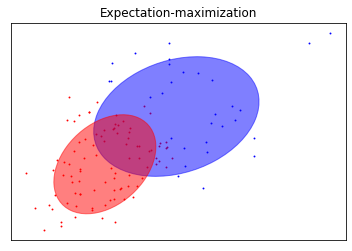

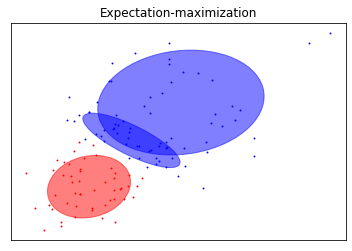

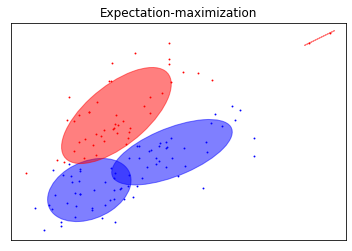

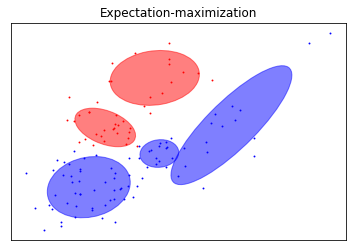

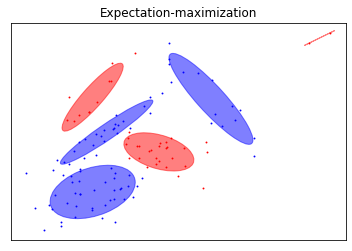

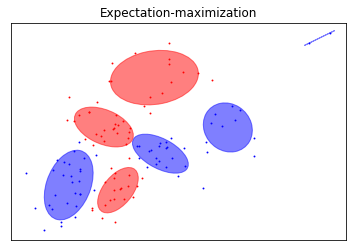

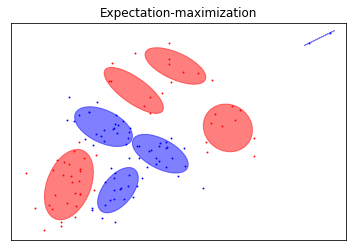

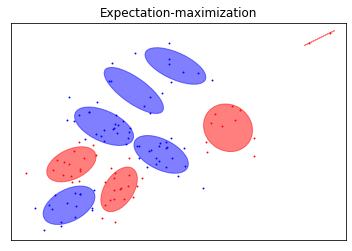

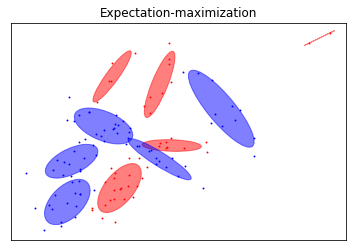

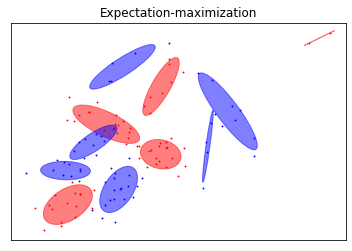

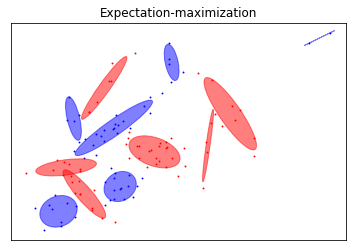

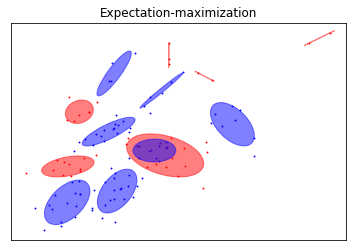

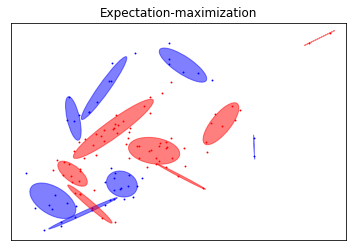

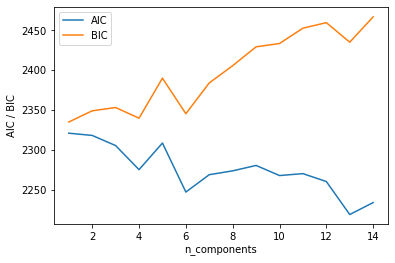

In [27]:
n_components = np.arange(1, 15)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)


X = df.drop('label', axis=1).values
for i, n in enumerate(n_components):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type='full').fit(X)
    gmm.fit(X)

    AIC[i] = gmm.aic(X)
    BIC[i] = gmm.bic(X)
    
    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Expectation-maximization')

plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')
plt.show()

# Plots are all shown in the above cells along with their best number of components result

# Question 8

<p>In this question we are going to work with panguan dataset<br>
We first try to plot 4 two features to find which one have the best discriminability for GMM<br>
Then we will fit a GMM on each Class for each of 4 pair features and find and compare the accuracy of them.<br>
Then we can compare the pair features and find the most discriminability one.<br>
At the end we will try the GMM with different components and fit them to the pairs to find AIC and BIC then we can find the best number of components for each class.</p>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import ScalarMappable

In [35]:
df_pang = pd.read_csv('penguins.csv')
df_pang = df_pang.dropna().reset_index().drop('index', axis=1)
df_pang

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Scatter plot each pair of features with respect to their class
<p>As it can be seen in the plots below:</p>

<img>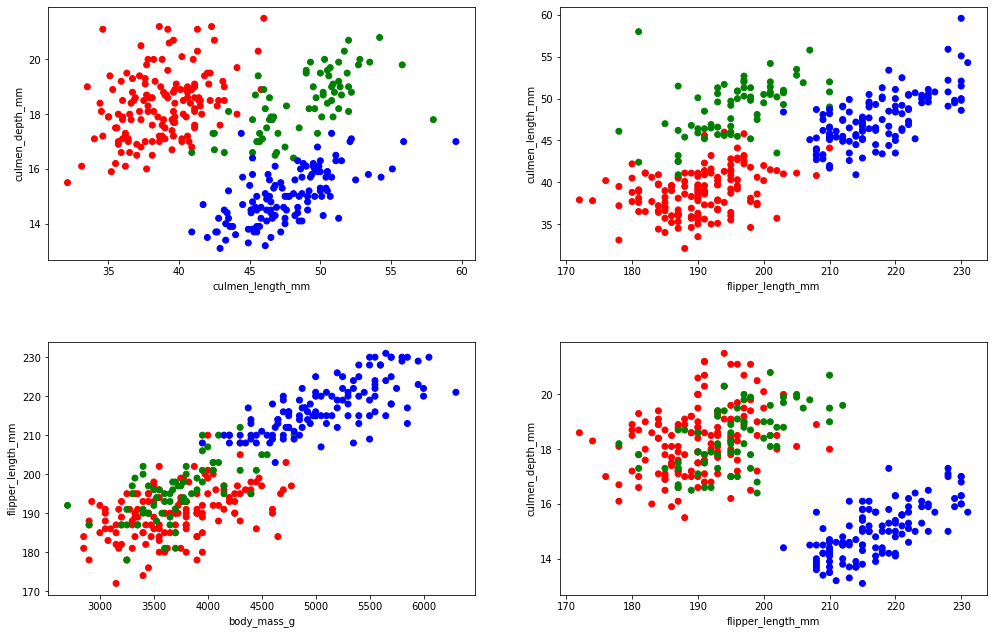</img>

<p>The most discriminability one, is the one in which point of classes are seperated and it can be easily fitted by a gaussian mixure model.<br>
In these plots, we can see the first one <b>{culmen_length_mm, culmen_depth_mm}</b> have the most discriminability since its classes are more seperated. After that the second plot <b>{culmen_length_mm, flipper_length_mm}</b> is seemed to have better discriminability.<br>
The other two plots obviously do not have good discriminability Since classes are mixed togheter can we can not seperate them easily.</p>

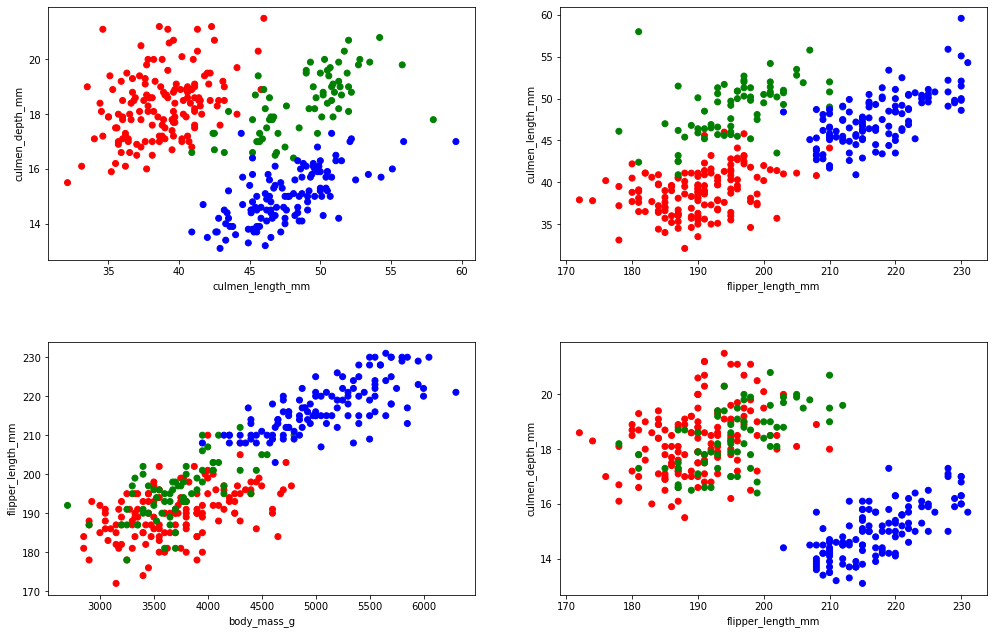

In [37]:
colors = ['red','green','blue']
class_labels = df_pang.species

import pandas as pd
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder().fit_transform(class_labels)
df_features = df_pang


fig, axs = plt.subplots(2, 2, figsize=(15,10))
matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


axs[0, 0].scatter(df_features.iloc[:,2], df_features.iloc[:,3], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors), label=class_labels)
axs[0, 0].set_xlabel(df_features.columns[2]); axs[0, 0].set_ylabel(df_features.columns[3])

axs[0, 1].scatter(df_features.iloc[:,4], df_features.iloc[:,2], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[0, 1].set_xlabel(df_features.columns[4]); axs[0, 1].set_ylabel(df_features.columns[2])

axs[1, 0].scatter(df_features.iloc[:,5], df_features.iloc[:,4], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[1, 0].set_xlabel(df_features.columns[5]); axs[1, 0].set_ylabel(df_features.columns[4])

axs[1, 1].scatter(df_features.iloc[:,4], df_features.iloc[:,3], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[1, 1].set_xlabel(df_features.columns[4]); axs[1, 1].set_ylabel(df_features.columns[3])


fig.tight_layout(pad=5)

In [38]:
def plot_results(X, Y, means, covariances, index, title, x_title, y_title):
    color_iter = ['green','blue', 'red']

    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

In [39]:
from sklearn import mixture
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

# Results of fitting GMM with 2 component for each class
<p>Here we fit a GMM with 2 component for each class and plot the container of the Gaussians. Moreover, we found the parameters <b>{mean of each 2 component and covariance}</b> for each GMM fitted on each class<br>
We did the fitting for each of 4 paires we plotted in the previos cell.</p>
<br><br>
<p><b>Results are all showen in the output of this cell</b></p>

Weights Of Class :  Adelie  In :  culmen_length_mm  And  culmen_depth_mm
Means:
 [[18.27079916 40.36434681]
 [18.43808636 36.99420393]]
Covariance:
 [[[1.15293353 1.41157668]
  [1.41157668 4.68894724]]

 [[1.84588731 1.35104592]
  [1.35104592 3.66806163]]]

Weights Of Class :  Chinstrap  In :  culmen_length_mm  And  culmen_depth_mm
Means:
 [[19.1292865  51.07447557]
 [17.47873238 45.85601008]]
Covariance:
 [[[0.6328921  0.28558998]
  [0.28558998 4.21070768]]

 [[0.56251373 0.39132921]
  [0.39132921 4.45222351]]]

Weights Of Class :  Gentoo  In :  culmen_length_mm  And  culmen_depth_mm
Means:
 [[15.48639434 49.37091382]
 [14.54510423 45.81421204]]
Covariance:
 [[[0.78205371 1.55537269]
  [1.55537269 8.43314366]]

 [[0.69781154 0.69971843]
  [0.69971843 4.48776234]]]



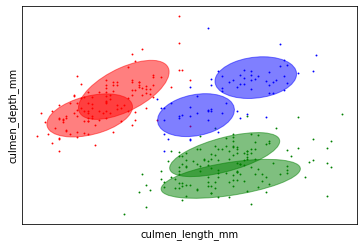

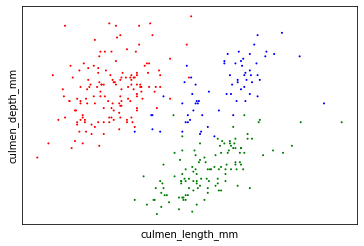

Accuracy of features :  culmen_length_mm  And  culmen_depth_mm  Is : 
32.93413173652694 



Weights Of Class :  Adelie  In :  flipper_length_mm  And  culmen_length_mm
Means:
 [[ 37.58102433 185.98409961]
 [ 39.87568366 193.58769517]]
Covariance:
 [[[ 4.38980727 -2.62545812]
  [-2.62545812 26.53494043]]

 [[ 6.87071777  4.80388455]
  [ 4.80388455 29.03582168]]]

Weights Of Class :  Chinstrap  In :  flipper_length_mm  And  culmen_length_mm
Means:
 [[ 50.90176207 200.4547949 ]
 [ 46.79687258 191.26166239]]
Covariance:
 [[[ 2.92908225  1.96236109]
  [ 1.96236109 28.17214632]]

 [[10.56202056  1.30778498]
  [ 1.30778498 29.79301912]]]

Weights Of Class :  Gentoo  In :  flipper_length_mm  And  culmen_length_mm
Means:
 [[ 46.06247039 213.04757149]
 [ 49.54644247 222.90080504]]
Covariance:
 [[[ 4.74797605  2.13571834]
  [ 2.13571834 14.99160795]]

 [[ 9.10538342  8.82615834]
  [ 8.82615834 24.24575139]]]



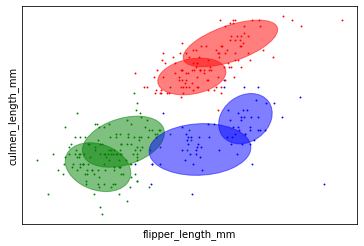

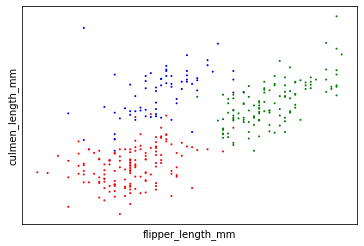

Accuracy of features :  flipper_length_mm  And  culmen_length_mm  Is : 
30.83832335329341 



Weights Of Class :  Adelie  In :  body_mass_g  And  flipper_length_mm
Means:
 [[4163.34406621  194.48632204]
 [3459.25446718  187.73528994]]
Covariance:
 [[[1.00138067e+05 2.33787921e+02]
  [2.33787921e+02 3.34284325e+01]]

 [[9.37799272e+04 3.33485493e+02]
  [3.33485493e+02 3.10205711e+01]]]

Weights Of Class :  Chinstrap  In :  body_mass_g  And  flipper_length_mm
Means:
 [[3552.7997426   192.72917263]
 [4100.0523055   202.12186682]]
Covariance:
 [[[7.37854429e+04 5.50744905e+02]
  [5.50744905e+02 3.20270873e+01]]

 [[9.07727735e+04 6.91633256e+02]
  [6.91633256e+02 2.77760555e+01]]]

Weights Of Class :  Gentoo  In :  body_mass_g  And  flipper_length_mm
Means:
 [[5527.40813162  221.56633796]
 [4735.5943558   213.71133509]]
Covariance:
 [[[8.86834888e+04 6.46528343e+02]
  [6.46528343e+02 3.80582931e+01]]

 [[9.57949490e+04 8.73920254e+02]
  [8.73920254e+02 1.87089178e+01]]]



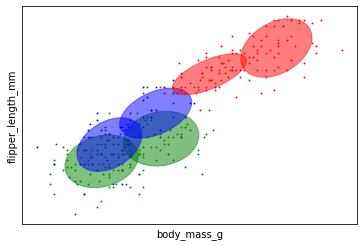

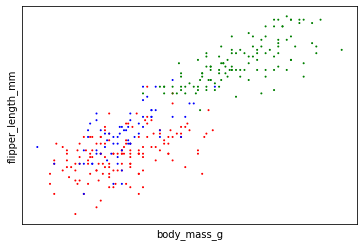

Accuracy of features :  body_mass_g  And  flipper_length_mm  Is : 
20.35928143712575 



Weights Of Class :  Adelie  In :  flipper_length_mm  And  culmen_depth_mm
Means:
 [[ 18.82958021 193.61196776]
 [ 17.73309418 185.6342351 ]]
Covariance:
 [[[ 1.45302282  0.73521365]
  [ 0.73521365 27.94710601]]

 [[ 0.83320466 -0.25379737]
  [-0.25379737 24.79796487]]]

Weights Of Class :  Chinstrap  In :  flipper_length_mm  And  culmen_depth_mm
Means:
 [[ 18.9247809  198.20131992]
 [ 17.12183878 189.69858081]]
Covariance:
 [[[ 0.75104944  2.63623266]
  [ 2.63623266 36.734553  ]]

 [[ 0.26578553 -1.28207166]
  [-1.28207166 32.50612479]]]

Weights Of Class :  Gentoo  In :  flipper_length_mm  And  culmen_depth_mm
Means:
 [[ 15.72216488 223.34638563]
 [ 14.53828878 213.29018211]]
Covariance:
 [[[ 0.65826587  2.35498787]
  [ 2.35498787 22.86683546]]

 [[ 0.60518988  1.27477038]
  [ 1.27477038 15.7504527 ]]]



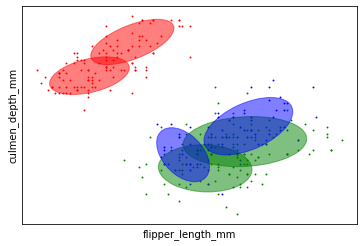

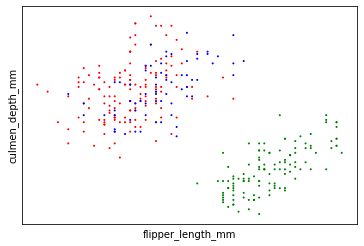

Accuracy of features :  flipper_length_mm  And  culmen_depth_mm  Is : 
29.34131736526946 





In [41]:
columns_features = [(2,3), (4,2), (5,4), (4,3)]
species_kind = ['Adelie' , 'Chinstrap','Gentoo']
color_iter = ['green','blue', 'red']

Y = LabelEncoder().fit_transform(df_pang.species)
for m,n in columns_features: 
    splot = plt.subplot(1, 1, 1)
    class_predic=[]
    
    for k in range(len(species_kind)):
        
        X = pd.DataFrame(df_pang[{df_pang.columns[m], df_pang.columns[n]}])
        X = X[df_pang['species'] == species_kind[k]].values


        gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', max_iter=100).fit(X)
        
        pred = gmm.predict(X)
        class_predic.extend(pred)
        
        means = gmm.means_
        covariances = gmm.covariances_
        data = X
        
        print('Weights Of Class : ', species_kind[k], ' In : ', df_pang.columns[m], ' And ', df_pang.columns[n])
        print('Means:\n', means)
        print('Covariance:\n', covariances)
        print()
        
        for i, (mean, covar) in enumerate(zip(means, covariances)):
            v, w = linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])

            if not np.any(pred == i):
                continue
            plt.scatter(data[pred == i, 0], data[pred == i, 1], .8, color=color_iter[k])

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[k])
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(df_pang.columns[m])
    plt.ylabel(df_pang.columns[n])
    plt.show()
    
    plt.scatter(df_features.iloc[:,m], df_features.iloc[:,n], 1, c=class_labels, cmap=matplotlib.colors.ListedColormap(['red','blue', 'green']), label=class_labels)
    plt.xlabel(df_features.columns[m]); plt.ylabel(df_features.columns[n])
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    accuracy = (sum(class_predic == Y)/len(Y))*100
    print('Accuracy of features : ', df_pang.columns[m], ' And ', df_pang.columns[n], ' Is : ')
    print(accuracy, '\n\n\n')
        
        

# Accuracy of each of the four pair features are calculated:

{Accuracy of features :  culmen_length_mm  And  culmen_depth_mm  Is : 32.93413173652694}<br>
{Accuracy of features :  flipper_length_mm  And  culmen_length_mm  Is : 30.83832335329341}<br>
{Accuracy of features :  body_mass_g  And  flipper_length_mm  Is : 20.35928143712575 }<br>
{Accuracy of features :  flipper_length_mm  And  culmen_depth_mm  Is : 29.34131736526946}<br>

<br><br>
<b>It can be seen the best accuracy was for the first pair of features and it was predicted in the first cell of this question. {culmen_length_mm  And  culmen_depth_mm}</b><br>
<p>This result was predicted since these two features could disribute all the classes better than the other and classes were seperated. So, when we fitted a GMM on this pair of feature it could be fitted pretty well and reach the highest accuracy between all the pairs.</p>

# Best Results for culmen_length_mm  And  culmen_depth_mm
<p>Here we are going to fit a GMM with defferent number of components to find the best fit. We plot AIC and BIC plots for the GMM and we know the best number of components equal to where AIC and BIC is minimum.<br>
We plot AIC and BIC for the best result of previos cell <b>{culmen_length_mm And culmen_depth_mm}</b> for each class and the for the whole points to find the best suited number of components.</p>

# AIC and BIC
<p>As the figures below indicate, for the first class best number of components is <b>2</b> <br>
for the second class best number of components is <b>4</b><br>
And for the third class its number is <b>3</b></p>

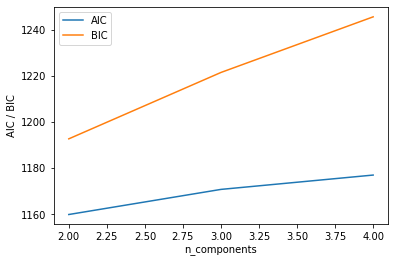

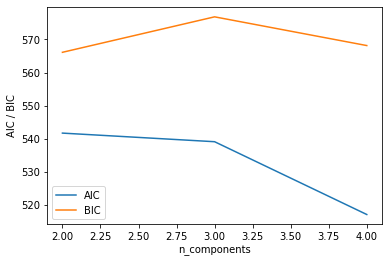

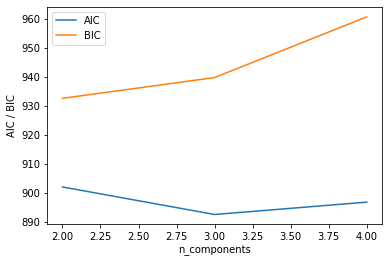

In [91]:
species_kind = ['Adelie' , 'Chinstrap','Gentoo']

    
n_components = np.arange(2, 6)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)


for k in range(len(species_kind)):

    X = pd.DataFrame(df_pang[{df_pang.columns[2], df_pang.columns[3]}])
    X = X[df_pang['species'] == species_kind[k]].values


    for i, n in enumerate(n_components):
        gmm = mixture.GaussianMixture(n_components=n, covariance_type='full', max_iter=100).fit(X)

        AIC[i] = gmm.aic(X)
        BIC[i] = gmm.bic(X)
    

    plt.figure()
    plt.plot(n_components, AIC, label='AIC')
    plt.plot(n_components, BIC, label='BIC')
    plt.legend(loc=0)
    plt.xlabel('n_components')
    plt.ylabel('AIC / BIC')
    plt.show()

# AIC and BIC for whole dataset
<p>If we fit the GMM for the whole dataset with different number of components we get the figure below:</p>

<img>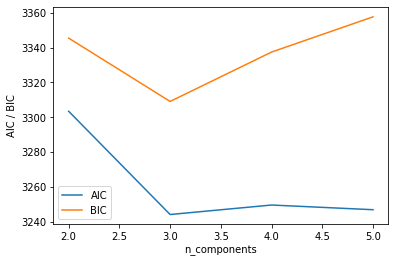</img>

<p>As it can be seen the best number of components for GMM to include all the dataset is <b>3</b> Since in this point both AIC and BIC is minimum</p>

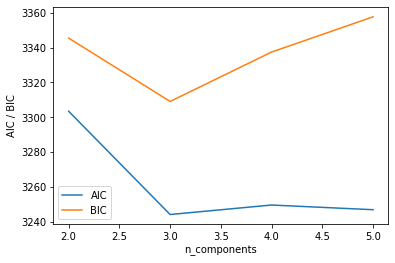

In [42]:
n_components = np.arange(2, 6)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

X = pd.DataFrame(df_pang[{df_pang.columns[2], df_pang.columns[3]}]).values


for i, n in enumerate(n_components):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type='full', max_iter=100).fit(X)

    AIC[i] = gmm.aic(X)
    BIC[i] = gmm.bic(X)


plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')
plt.show()

# Question 9

<p>In this question we are going to fit GMM on Moon dataset. <br>
We are going to impliment a GMM using EM algorithm to find its parameters.</p>

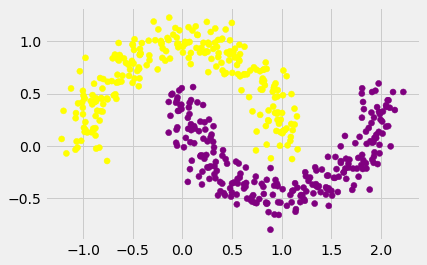

In [107]:
from sklearn import cluster, datasets, mixture
noisy_moons = datasets.make_moons(n_samples=500, noise=.11)
class_labels = noisy_moons[1]

plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c=class_labels, cmap=matplotlib.colors.ListedColormap(['yellow','purple']), label=class_labels)
plt.show()


In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# Here We impliment the EM algorithm to find best GMM
<p>It consist of E-step, M-step, Accuracy finding and Threshhold finding</p>

In [310]:
#the only way to detect the accuracy is vote of the majority
#for each label given
#we check which iris type is the majority
#we consider the majority as the correct classification
#all we need to do is to count the minority
def get_accuracy(data,class_,checked):
    
    df=data.copy()
    #use dictionary to keep track of everything
    d={}
    
    #counting
    for i in df['label'][df['class']==class_].unique():
        if i not in checked and i!=-1:
            d[i]=df['label'][df['class']==class_].tolist().count(i)

    #comparison
    temp=-1
    lbl=None
    for i in d:
        if d[i]>temp:
            lbl=i
            temp=d[i]

    return len(df['label'][df['class']==class_][df['label']!=lbl])

#initialize random miu, sigma and weight for each gaussian
#you can use random number like i do
#or use kmeans centroids which is more computation expensive
def init_params(df,num_of_clusters):
    
    mean_vec=[];cov_mat=[];w_vec=[]

    for _ in range(num_of_clusters):
        mean_vec.append(
            df.loc[np.random.choice(len(df),10)].mean().tolist())
        cov_mat.append(np.diag([1]*len(df.columns)))
        w_vec.append(1/num_of_clusters)
    
    return (mean_vec,cov_mat,w_vec)

#pdf of multivariate gaussian
#equivalent to scipy.stats.multivariate_normal(miu,sigma).pdf(X)
def multivariate_gaussian(data,miu,sigma):
    
    numerator=np.exp(-0.5*(
        np.mat(data)-miu)*np.linalg.inv(sigma)*(np.mat(data)-miu).T)

    denominator=(2*np.pi)**(data.shape[1]/2)*np.linalg.det(sigma)**0.5

    return np.diagonal(numerator/denominator)

#e step
#compute the posterior probability with given params
def e_step(data,num_of_clusters,params):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    TEMP={}
    posterior={}
    
    #Bayes rule
    for i in range(num_of_clusters):        
        
        TEMP[i]=multivariate_gaussian(data,mean_vec[i],cov_mat[i])*w_vec[i]
    
    #compute posterior
    for i in range(num_of_clusters):
        
        posterior[i]=TEMP[i]/np.sum([TEMP[i] for i in TEMP],axis=0)
        
    return posterior


#m step
#use posterior probability to update params
def m_step(data,num_of_clusters,params,posterior):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    #solving lagrangian by partial derivatives
    for i in range(num_of_clusters):

        mean_vec[i]=np.sum(
            np.multiply(
                np.mat(data),
                posterior[i].reshape(-1,1),),axis=0)/sum(posterior[i]).T
        
        cov_mat[i]=np.multiply(
            posterior[i].reshape(-1,1),
            (np.mat(data)-mean_vec[i])).T*(
            np.mat(data)-mean_vec[i])/sum(posterior[i])
        
        w_vec[i]=posterior[i].mean()
        
    return (mean_vec,cov_mat,w_vec)


#using jensens inequality to compute the lower bound
#which is the function of the expectation
def get_lower_bound(data,num_of_clusters,params,posterior):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    lowerbound=0

    for i in range(num_of_clusters):

        #log pdf of multivariate gaussian
        logpdf=np.log(multivariate_gaussian(data,mean_vec[i],cov_mat[i]))
        
        #use bayes rules to decompose the numerator of the lower bound
        lowerbound+=np.sum(
            posterior[i]*(logpdf+np.log(w_vec[i])-np.log(posterior[i])))

    return lowerbound

#using mle for training
def training(data,num_of_clusters,
             tolerance=0.0001,num_of_itr=50,diagnosis=False):
    
    #initialize
    lower_bound_old=None
    lower_bound=None
    counter=0    
    
    #initial parameters
    params=init_params(data,num_of_clusters)

    #cap the maximum number of iterations
    while counter<num_of_itr:
        
        try:
            
            #e step
            posterior=e_step(data,num_of_clusters,params)
            
            #m step
            params=m_step(data,num_of_clusters,params,posterior)
            
            #use lower bound to determine if converged
#             lower_bound_old=lower_bound
#             lower_bound=get_lower_bound(data,num_of_clusters,params,posterior)
            
            
#             if lower_bound_old and np.abs(lower_bound/lower_bound_old-1)<tolerance:  
#                 if diagnosis:
#                     print(f'{counter} iterations to reach convergence\n')
#                 return params
            
            counter+=1
        
        #reboot everything when singular matrix is encountered
        except np.linalg.LinAlgError:
            
            params=init_params(data,num_of_clusters)
            lower_bound_old=None
            lower_bound=None
            counter=0
    
    if diagnosis:
        print(f'{counter} iterations to reach convergence\n')
        
#     logpdf=np.log(multivariate_gaussian(data,mean_vec[i],cov_mat[i]))
    
#     AIC = (-2/len(data)) * logpdf + 2 * (2/len(data))
#     print(AIC)
    
    return params

#the main function
def gmm(df,xcols,num_of_clusters,tolerance=0.001,num_of_itr=50,diagnosis=False):
    
    data=df.copy()
    
    #obtain parameters of gmm
    params=training(data[xcols],num_of_clusters,
                    tolerance,num_of_itr,diagnosis)
    
    #compute the prediction probability
    posterior=e_step(data[xcols],num_of_clusters,params)
    #make forecast based upon probability
    data['label']=np.argmax(
          np.concatenate(
              [posterior[i].reshape(-1,1) for i in posterior],axis=1),1)
    
    #compute accuracy
    erreur=0
    checked=[]
    for i in data['class'].unique():
        erreur += get_accuracy(data,i,checked)
        checked.append(i)
    accuracy=1-erreur/len(df)
    if diagnosis:
        print('\naccuracy: %s'%(accuracy))
    
    return params,posterior

# We rung the EM algorithm with custom number of GMM components
<p>Here after 100 iterations with convergence into accuracy of 29%</p><br>
<br>
<p>Here we can plot the container for each GMM here</p>

<img>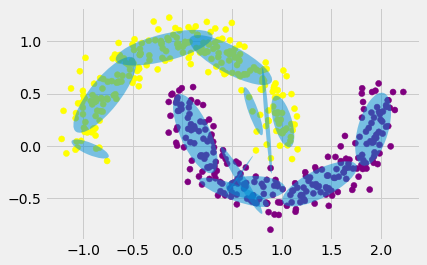</img>


In [323]:
df = pd.DataFrame(noisy_moons[0] , columns=['x', 'y'])
df['class'] = noisy_moons[1]
xcols = ['x', 'y']

num_of_clusters = 14
params,posterior=gmm(df,xcols,num_of_clusters,num_of_itr=100,diagnosis=True)

<ipython-input-310-4c47bca73a6e>:48: RuntimeWarning: overflow encountered in exp
  numerator=np.exp(-0.5*(
<ipython-input-310-4c47bca73a6e>:53: RuntimeWarning: overflow encountered in true_divide
  return np.diagonal(numerator/denominator)


100 iterations to reach convergence


accuracy: 0.29600000000000004


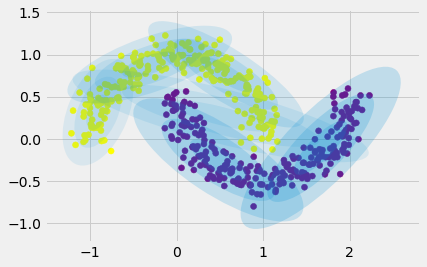

In [313]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

class_labels = noisy_moons[1]
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c=class_labels, cmap=matplotlib.colors.ListedColormap(['yellow','purple']), label=class_labels)

w_factor = 0.2 / max(params[2])
for pos, covar, w in zip(params[0], params[1], params[2]):
    draw_ellipse(np.array(pos)[0], covar, alpha=w * w_factor)

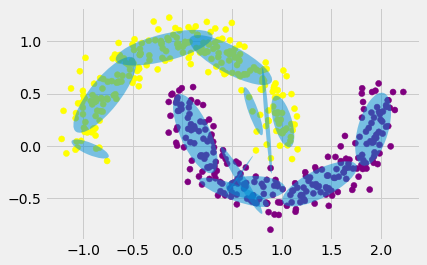

In [324]:

class_labels = noisy_moons[1]
splot = plt.subplot(1, 1, 1)
for i, (mean, covar) in enumerate(zip(params[0], params[1])):
    mean = np.array(mean)[0]
    
    v, w = linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
        
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c=class_labels, cmap=matplotlib.colors.ListedColormap(['yellow','purple']), label=class_labels)
plt.show()

# Question 12

# HMM
<p>Here we have some probilities of different satets and outcomes, and we want to calculate the probility of happening a series of outcomes.<br>
<br>
After definning the states we can see we have 3 main states <b>{Start, Healty, Sick}</b>, and 3 different outcomes <b>{Fever, Coughing, Sneezing}</b><br>
<br>
We the calculate the Alpha and Beta matrices for Hidden Markov Model. Alpha elements represent the probility of going from state i to j, and Beta Elements represnt the probility of seeing outcome i in when we are in state j.<br>
<br>
Then with the use of forward algorithm we find the probility of seeing next outcome in outcomes sequence in each state. the state with the biggest probility will be chosen for our main path. the final path includes a series of state numbers which is the most happening probility to see the desired outcome.
</p>

# Results
<p>The most probably result to see the Vt = 'FFSCFCSCSCFF' outcome is :<br>
[1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]<br>
    in which 1 indicate health and 2 indicate sick.</p>

In [8]:
import numpy as np

p = dict()
p['start'] = 1

p['sick|start'] = 0.1
p['sick|sick'] = 0.9
p['sick|healthy'] = 0.4

p['healthy|start'] = 0.9
p['healthy|healthy'] = 0.6
p['healthy|sick'] = 0.1

p['fever|sick'] = 0.8
p['sneezing|sick'] = 0.1
p['coughing|sick'] = 0.1

p['fever|healthy'] = 0.1
p['sneezing|healthy'] = 0.7
p['coughing|healthy'] = 0.2


# Vt = 'FFSCFCSCSCFF'
# Vt = [v[2], v[2], v[0], v[1], v[2], v[1], v[0], v[1], v[0], v[1], v[2], v[2]]
Vt = [2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2]
V = ['Vs', 'Vc', 'Vf']
W = ['Wst', 'Wh', 'Ws']

alpha = [[0, 0.9, 0.1],
         [0, 0.4, 0.6],
         [0, 0.4, 0.9]]

beta = [[0,     0,   0],
        [0.7, 0.2, 0.1],
        [0.1, 0.1, 0.8]]

old_w = [1,
         0,
         0]

final_path = []
for k in Vt:
    w_new = np.zeros(len(W))
    for i in range(len(W)):       
        temp = 0
        
        for j in range(len(W)):
            temp += old_w[j] * alpha[j][i]
#         print('Path nunber: ' ,Vt[k] ,temp, beta[i][k])
        w_new[i] = beta[i][k] * temp
    
    path = list(w_new)
#     print(path)
    final_path.append(path.index(max(path)))
    
    old_w = w_new

# print()
print(final_path)

[1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]


# Change the probilities:
<p>Here we change the start probility of being sick and healthy for the first time in the start state, meaning we change 0.1 probility of begining with sick, and 0.9 probility of begining with healthy.<br>
<br>
the most probable seires of state to see the same outcome as previos cell is:<br>
[2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]<br>
When we compare the results we find out the only state that changes is the first state. here we begin with the sick state but in the last cell we have began with the healthy state since it had the most probility of begining after start state.
</p>

In [9]:
Vt = [2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2]
V = ['Vs', 'Vc', 'Vf']
W = ['Wst', 'Wh', 'Ws']

alpha = [[0, 0.1, 0.9],
         [0, 0.4, 0.6],
         [0, 0.4, 0.9]]

beta = [[0,     0,   0],
        [0.7, 0.2, 0.1],
        [0.1, 0.1, 0.8]]

old_w = [1,
         0,
         0]

final_path = []
for k in Vt:
    w_new = np.zeros(len(W))
    for i in range(len(W)):       
        temp = 0
        
        for j in range(len(W)):
            temp += old_w[j] * alpha[j][i]
#         print('Path nunber: ' ,Vt[k] ,temp, beta[i][k])
        w_new[i] = beta[i][k] * temp
    
    path = list(w_new)
#     print(path)
    final_path.append(path.index(max(path)))
    
    old_w = w_new

# print()
print(final_path)

[2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]
